## Energy Saved From Recycling Glass, Metal, and Plastic in Singapore (2015-2019)

Author: Ethan Galebach

<p>Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.</p>
<p>Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.</p>
<p><b>The government would like to motivate citizens by sharing the total energy that the combined recycling efforts of Glass, Metals, and Plastics have saved every year since 2015. </b> </p>
<p> The data come from different teams, so the names of waste types may differ.</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/wastestats.csv - Recycling statistics per waste type for the period 2003 to 2017</b>
    </div>
    <div>Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>waste_type: </b>The type of waste recycled.</li>
    <li><b>waste_disposed_of_tonne: </b>The amount of waste that could not be recycled (in metric tonnes).</li>
    <li><b>total_waste_recycle_tonne: </b>The amount of waste that could be recycled (in metric tonnes).</li>
    <li><b>total_waste_generated: </b>The total amount of waste collected before recycling (in metric tonnes).</li>
    <li><b>recycling_rate: </b>The amount of waste recycled per tonne of waste generated.</li>
    <li><b>year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/2018_2019_waste.csv - Recycling statistics per waste type for the period 2018 to 2019</b>
    </div>
    <div> Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>Waste Type: </b>The type of waste recycled.</li>
    <li><b>Total Generated: </b>The total amount of waste collected before recycling (in thousands of metric tonnes).</li> 
    <li><b>Total Recycled: </b>The amount of waste that could be recycled. (in thousands of metric tonnes).</li>
    <li><b>Year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/energy_saved.csv -  Estimations of the amount of energy saved per waste type in kWh</b>
    </div>
<ul>
    <li><b>material: </b>The type of waste recycled.</li>
    <li><b>energy_saved: </b>An estimate of the energy saved (in kiloWatt hour) by recycling a metric tonne of waste.</li> 
    <li><b>crude_oil_saved: </b>An estimate of the number of barrels of oil saved by recycling a metric tonne of waste.</li>
</ul>

</div>
<pre><code>
</code></pre>

Project Source: Datacamp

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#ETL: 2015-2017 Total Recycled Metric Tonnes (t) for each type of waste: waste_2015_2017

wastestats = pd.read_csv('datasets/wastestats.csv')

#Make category and column names consistent with other datasets
wastestats['waste_type'] = wastestats['waste_type'].str.title()

s = wastestats[~wastestats['waste_type'].str.endswith('ss')]['waste_type'] \
                                        .str.rstrip('s')

wastestats['waste_type'] = s.combine_first(wastestats['waste_type'])

waste_2015_2017 = wastestats[wastestats['waste_type'] \
                                 .isin(['Ferrous Metal','Non-Ferrous Metal','Plastic','Glass']) \
                             & wastestats['year'] \
                                 .isin(['2015','2016','2017','2018','2019'])] \
                        .groupby(['waste_type','year'])[['total_waste_recycled_tonne']] \
                        .sum() \
                        .reset_index()

waste_2015_2017.rename(columns={'waste_type':'Waste Type', \
                                'total_waste_recycled_tonne':'Total Recycled (t)'} \
                       , inplace = True)

waste_2015_2017

,Waste Type,year,Total Recycled (t)
0,Ferrous Metal,2015,1333300.0
1,Ferrous Metal,2016,1351500.0
2,Ferrous Metal,2017,1371000.0
3,Glass,2015,14600.0
4,Glass,2016,14700.0
5,Glass,2017,12400.0
6,Non-Ferrous Metal,2015,160400.0
7,Non-Ferrous Metal,2016,95900.0
8,Non-Ferrous Metal,2017,92200.0
9,Plastic,2015,57800.0


In [6]:
#ETL: 2018-2019 Total Recycled Metric Tonnes (t) for each type of waste: waste_2018_2019

waste_2018_2019_raw = pd.read_csv('datasets/2018_2019_waste.csv')

#Make category and column names consistent with other datasets
waste_2018_2019 = waste_2018_2019_raw.rename( \
                    columns={waste_2018_2019_raw.columns[2]: 'Total Recycled (t)', \
                             'waste_type':'Waste Type', \
                             'Year':'year'})

s = waste_2018_2019[~waste_2018_2019['Waste Type'].str.endswith('ss')]['Waste Type'] \
        .str.rstrip('s')

waste_2018_2019['Waste Type'] = s.combine_first(waste_2018_2019['Waste Type'])

waste_2018_2019 = waste_2018_2019[waste_2018_2019['Waste Type'] \
                                    .isin(['Glass','Plastic','Ferrous Metal','Non-Ferrous Metal'])] \
                            .groupby(['Waste Type','year'])[['Total Recycled (t)']].sum().reset_index()

waste_2018_2019['Total Recycled (t)'] = waste_2018_2019['Total Recycled (t)']*1000

waste_2018_2019



,Waste Type,year,Total Recycled (t)
0,Ferrous Metal,2018,126000
1,Ferrous Metal,2019,1270000
2,Glass,2018,12000
3,Glass,2019,11000
4,Non-Ferrous Metal,2018,170000
5,Non-Ferrous Metal,2019,124000
6,Plastic,2018,41000
7,Plastic,2019,37000


In [22]:
#Union 2015-2017 data and 2018-2019 data: waste

waste = pd.concat([waste_2018_2019,waste_2015_2017], ignore_index=True)

waste['year'] = waste['year'].astype(int)

waste

,Waste Type,year,Total Recycled (t)
0,Ferrous Metal,2018,126000.0
1,Ferrous Metal,2019,1270000.0
2,Glass,2018,12000.0
3,Glass,2019,11000.0
4,Non-Ferrous Metal,2018,170000.0
5,Non-Ferrous Metal,2019,124000.0
6,Plastic,2018,41000.0
7,Plastic,2019,37000.0
8,Ferrous Metal,2015,1333300.0
9,Ferrous Metal,2016,1351500.0


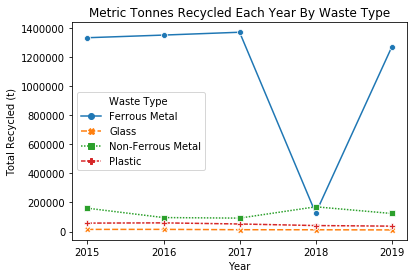

In [33]:
ax = sns.lineplot(x = 'year', y = 'Total Recycled (t)', hue = 'Waste Type', data = waste, 
            style = 'Waste Type', markers = True, dashes = True)

plt.xticks(np.arange(2015,2020))

plt.xlabel("Year")
plt.title("Metric Tonnes Recycled Each Year By Waste Type")

plt.show()


In [8]:
#Print description of the energy_saved csv file

energy_saved_raw = pd.read_csv('datasets/energy_saved.csv', index_col = 0)

print(energy_saved_raw.index.name)

The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type


In [9]:
#ETL: kWh saved per 1 metric tonne recycled by material: energy_saved

energy_saved = energy_saved_raw.T[['material','energy_saved']].reset_index(drop=True)

energy_saved.columns.name = None

energy_saved['energy_saved'] = pd.to_numeric(energy_saved['energy_saved'].str.rstrip(' Kwh').str.rstrip(' kWh'))

energy_saved

,material,energy_saved
0,Plastic,5774
1,Glass,42
2,Ferrous Metal,642
3,Non-Ferrous Metal,14000
4,Paper,4000


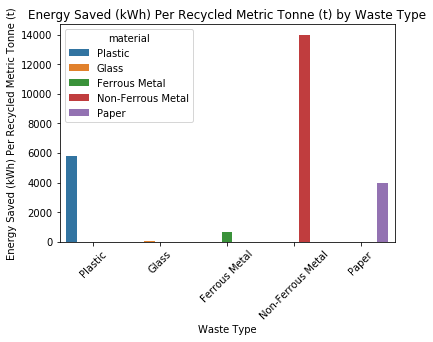

In [47]:
ax = sns.barplot(x = 'material', y = 'energy_saved', hue = 'material', data = energy_saved)

plt.xlabel("Waste Type")
ax.set_xticklabels(energy_saved['material'], rotation = 45)
plt.ylabel("Energy Saved (kWh) Per Recycled Metric Tonne (t)")
plt.title("Energy Saved (kWh) Per Recycled Metric Tonne (t) by Waste Type")
plt.show()

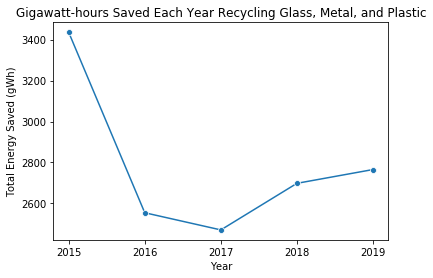

In [58]:
#Compute and plot total kWhs saved each year
saved = waste.merge(energy_saved, left_on = 'Waste Type', right_on = 'material')

saved['total_energy_saved'] = saved['Total Recycled (t)'].multiply(saved['energy_saved']) \
                                                         .div(1000000)

annual_energy_savings = saved.groupby('year')[['total_energy_saved']].sum()

ax = sns.lineplot(x = annual_energy_savings.index, y = 'total_energy_saved', data = annual_energy_savings,
                  marker = 'o')

plt.xticks(np.arange(2015,2020))

plt.xlabel("Year")
plt.ylabel("Total Energy Saved (gWh)")
plt.title("Gigawatt-hours Saved Each Year Recycling Glass, Metal, and Plastic")

plt.show()

## Conclusions

Recycled metals (both ferrous and non-ferrous) have been the largest contributor to total energy saved.  

If Singapore wants to prioritize saving energy on its way to zero waste, it should prioritze incentives for consumers to recycle metals over glass and plastic.